In [ ]:
"""
ResNet Trial
Global Feature Selection 
    - X = 'Depth (m)','iso_classes_encoded', 'Oberhollenzer_classes', 
    'σ,v (kPa)', 'σ',v (kPa)'.
    
    - Y = 'qc (MPa)','fs (kPa)'.

Link: https://github.com/DowellChan/ResNetRegression
"""
#General Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, CSVLogger
from sklearn.model_selection import train_test_split
import time

'''
PreProcessing
''' 
#Loading Database
df_cpt=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Target_Encoded_Database.csv')

#Dropping zeros from qc
df_cpt = df_cpt[~(df_cpt[['qc (MPa)']] == 0).any(axis = 1)]
df_cpt = df_cpt[~(df_cpt[['qc (MPa)']] < 0).any(axis = 1)]
df_cpt = df_cpt[~(df_cpt[['SBT (-)']] == 0).any(axis = 1)]
df_cpt = df_cpt[~(df_cpt[['SBTn (-)']] == 0).any(axis = 1)]
df_cpt = df_cpt[~(df_cpt[['Mod. SBTn (-)']] == 0).any(axis = 1)]

#Transforming to DataFrame
df_cpt=pd.DataFrame(df_cpt)
df_cpt=df_cpt.drop(columns = 'Unnamed: 0')

#Defining X an y
X_x=df_cpt[['Depth (m)', 'σ,v (kPa)', "σ',v (kPa)", 'SBT (-)', 'SBTn (-)', 
            'Mod. SBTn (-)', 'iso_classes_encoded', 'Oberhollenzer_classes']].values

y_y=df_cpt[['fs (kPa)']].values

#Features
features=df_cpt[['Depth (m)', 'σ,v (kPa)', "σ',v (kPa)", 'SBT (-)', 'SBTn (-)', 
            'Mod. SBTn (-)', 'iso_classes_encoded', 'Oberhollenzer_classes']].columns

#Scaling the and preparing the data
scalerX=MinMaxScaler()
scalerY=MinMaxScaler()

#Scaling the Data
X=scalerX.fit_transform(X_x)
y=scalerY.fit_transform(y_y)

In [ ]:
'''Random Forest Importance'''
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV, RFE

rfc = RandomForestRegressor(n_estimators = 100, n_jobs = -1, random_state = 42)
rfecv = RFECV(estimator = rfc, step=1, min_features_to_select = 8, scoring = 'r2')
rfecv.fit(X, y.ravel())
rf_importances = rfecv.estimator_.feature_importances_

Random_Forest


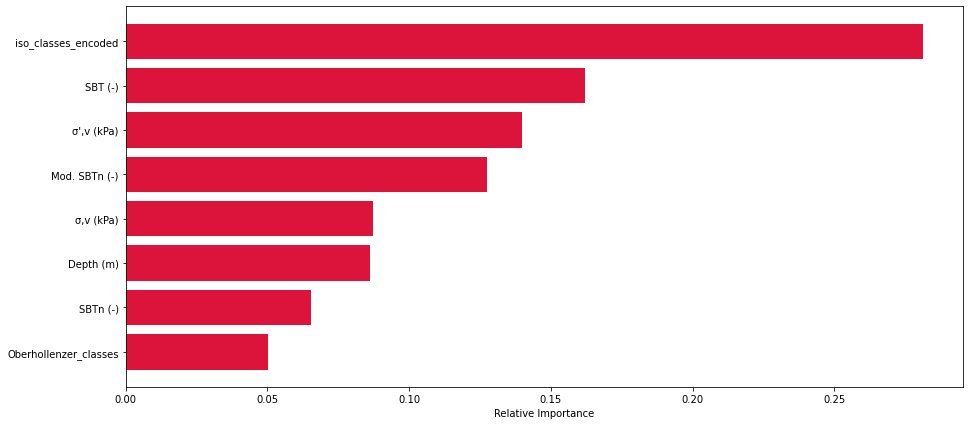

In [ ]:
'''
Plotting
'''
#Def plot for RandomForest
def plot_importance_RandomForest(importances):
    indices=np.argsort(importances)
    plt.figure(figsize=(15, 7))
    #plt.title('RandomForest Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='crimson', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.savefig('RandomForest_Features_3-fs.png', dpi=600)
    plt.show()

#Plotting RandomForest
print('Random_Forest')
plot_importance_RandomForest(rf_importances)